In [229]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind,ttest_rel
from scipy import stats


In [230]:
data=pd.read_csv('adult.csv')
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [231]:
data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [232]:
# for column in data.columns:
#     if data[data[column]=="?"]:
#             print(column)

In [233]:
data_num=data.copy()

In [234]:
data.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [235]:
data.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [236]:
data.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Data Cleaning

#fixing the common nan values -> nan values were as ? in data.Hence we fix this with most frequent element(mode) in the entire dataset. It generates well, as we will see with the accuracy of our classifiers.

In [237]:
attrib,counts=np.unique(data['workclass'],return_counts=True)
most_freq_attrib=attrib[np.argmax(counts,axis=0)]
data['workclass'][data['workclass']=='?']=most_freq_attrib

attrib,counts=np.unique(data['occupation'],return_counts=True)
most_freq_attrib=attrib[np.argmax(counts,axis=0)]
data['occupation'][data['occupation']=='?']=most_freq_attrib

attrib,counts=np.unique(data['native-country'],return_counts=True)
most_freq_attrib=attrib[np.argmax(counts,axis=0)]
data['native-country'][data['native-country']=='?']=most_freq_attrib

In [238]:
data['workclass'][data['workclass']=='?']

Series([], Name: workclass, dtype: object)

In [239]:
data.head(10)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [240]:
data['income']=data['income'].map({'<=50k':1,'>50k':0,'<=50k.':1,'>50k.':1})
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,NaN
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,NaN
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,NaN
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,NaN
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,NaN


Summary

1.summary statistics for numeric attribute

In [241]:
data_num=data.drop(['educational-num','income'],axis=1)
data_num.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


2. Summary and count for categorical attribute

In [242]:
data.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,36705,15784,22379,8981,19716,41762,32650,44689


EDA (Exploratory Data Analysis)

1. Univariate analysis

1.1 Age

i.Distribution

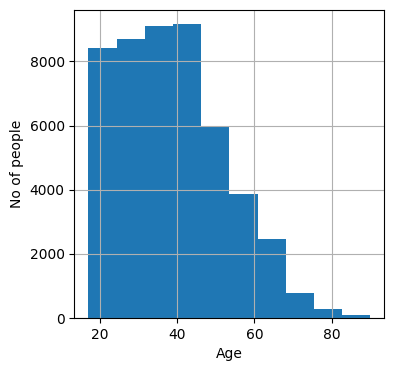

In [243]:
data['age'].hist(figsize=(4,4))
plt.xlabel('Age')
plt.ylabel('No of people')
plt.show()


In [244]:
data[data['age']>70].shape

(868, 14)

<Axes: ylabel='age'>

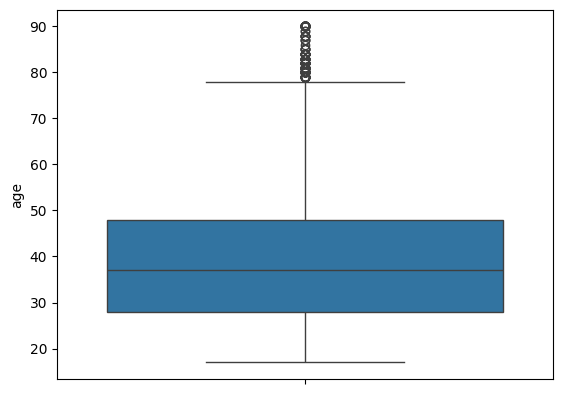

In [245]:
sns.boxplot(data['age'])

1.2 Hours per week

i. Distribution

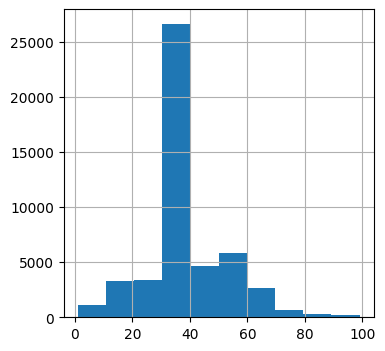

In [246]:
data['hours-per-week'].hist(figsize=(4,4))
plt.show()

<Axes: ylabel='hours-per-week'>

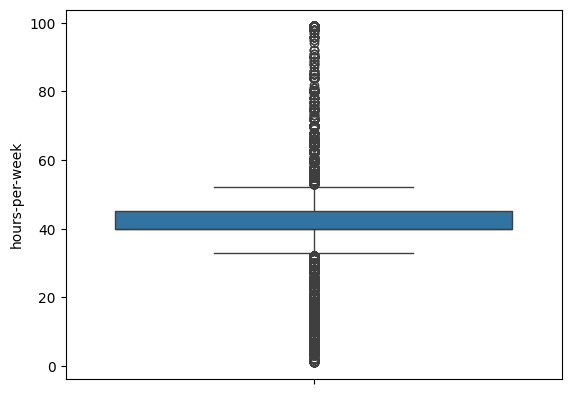

In [247]:
sns.boxplot(data['hours-per-week'])


1.4 Capital-gain

i. Distribution

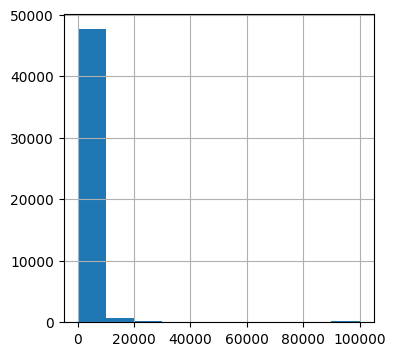

In [248]:
data['capital-gain'].hist(figsize=(4,4))
plt.show()

1.4

i.Distribution

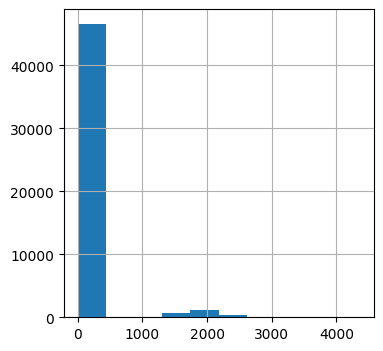

In [249]:
data['capital-loss'].hist(figsize=(4,4))
plt.show()

In [250]:
data[data['capital-loss']>0].shape

(2282, 14)

Relation between capital gain and capital loss

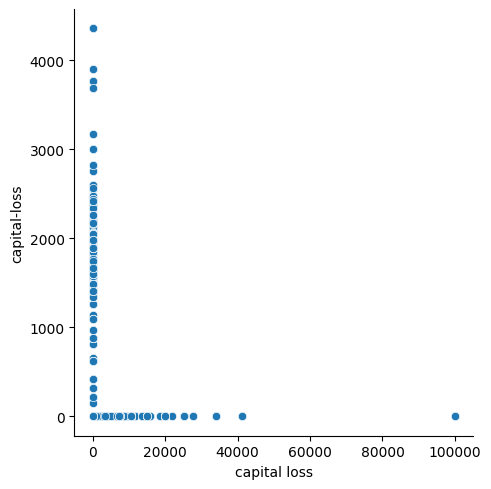

In [251]:
sns.relplot(x='capital-gain',y='capital-loss',data=data)
plt.xlabel('capital gain')
plt.xlabel('capital loss')
plt.show()


1.5 Workclass

i. Distribution

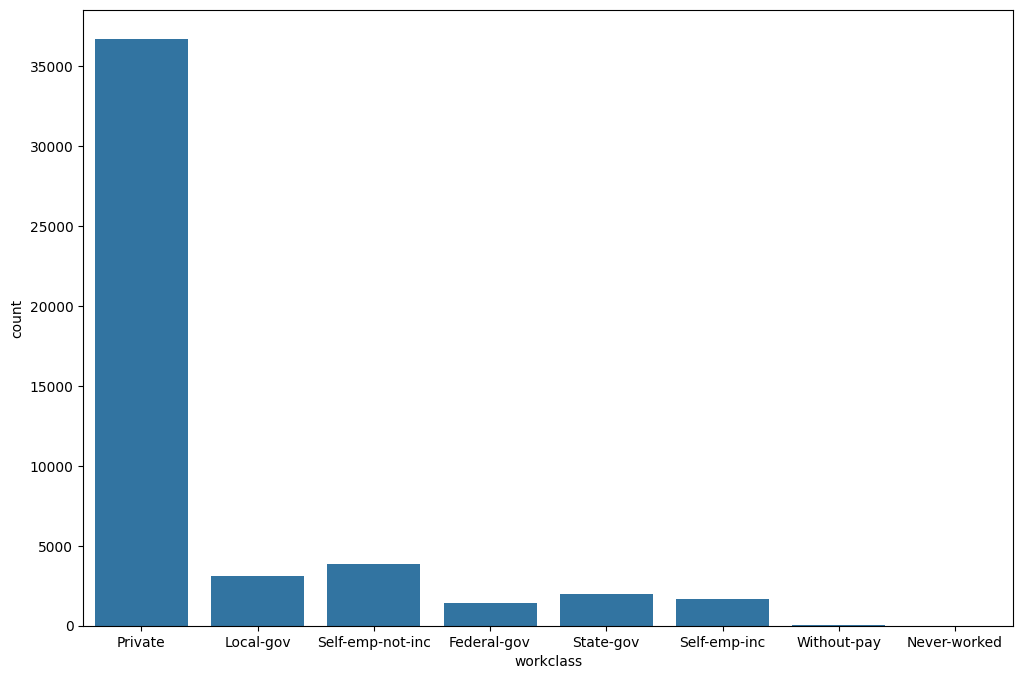

In [252]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='workclass',data=data)
plt.show()

In [253]:
# sns.boxplot(data['workclass'])


1.6 Education


i. Distribution

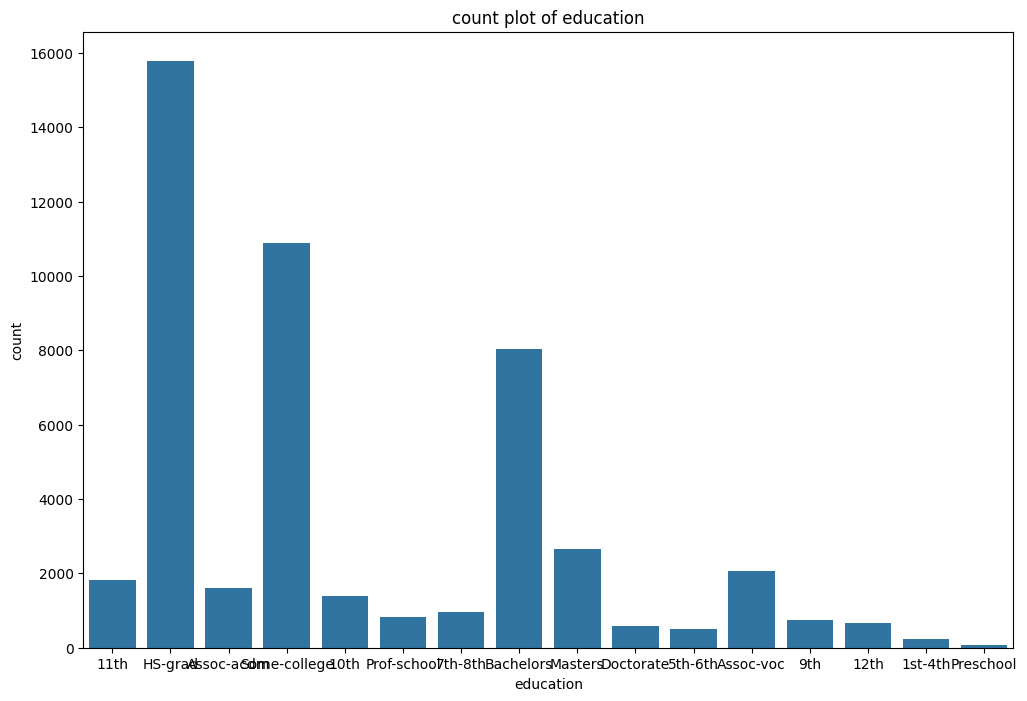

In [261]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='education',data=data)
plt.title('count plot of education')
plt.show()

ii.Description about distribution

->There are 16 unique categories present in the education attribute.


->HS-grad has 32.32% of all the education attribute.


->HS-grad(15784) has the maximum number of observations followed by some-college(10878) and Bachelors(8025).


->Pre-school has minimum samples i.e 83

In [263]:
data[data['education']=='Preschool'].shape

(83, 14)

1.8 Marital-status

i.Distribution

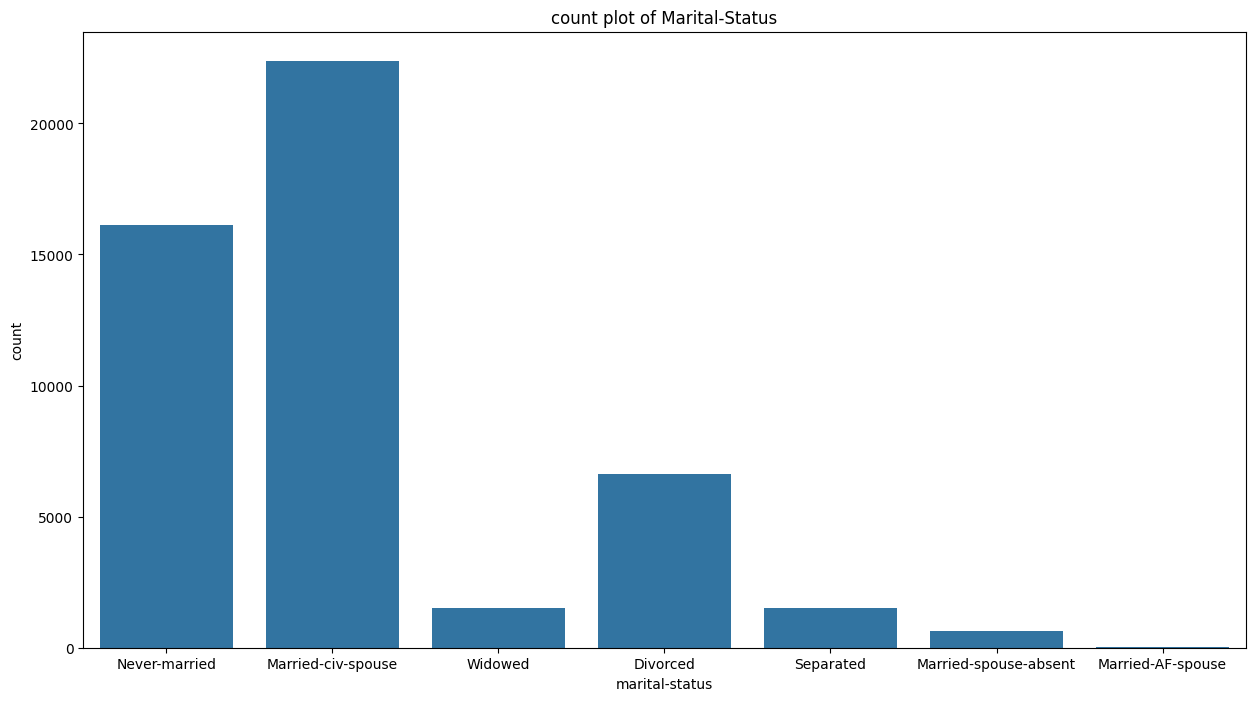

In [264]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x='marital-status',data=data)
plt.title('count plot of Marital-Status')
plt.show()

ii.Description about distribution

-> This marital-status attribute has 7 unique categories,

->Two of them are dominate over other categories are Never-married(33%) and married -civ-spouse(45.82%).

->Married-civ-spouse has maximum number of samples.

->Married-AF-spouse has minimum  number of obs

1.9 Occupation

i.Distribution

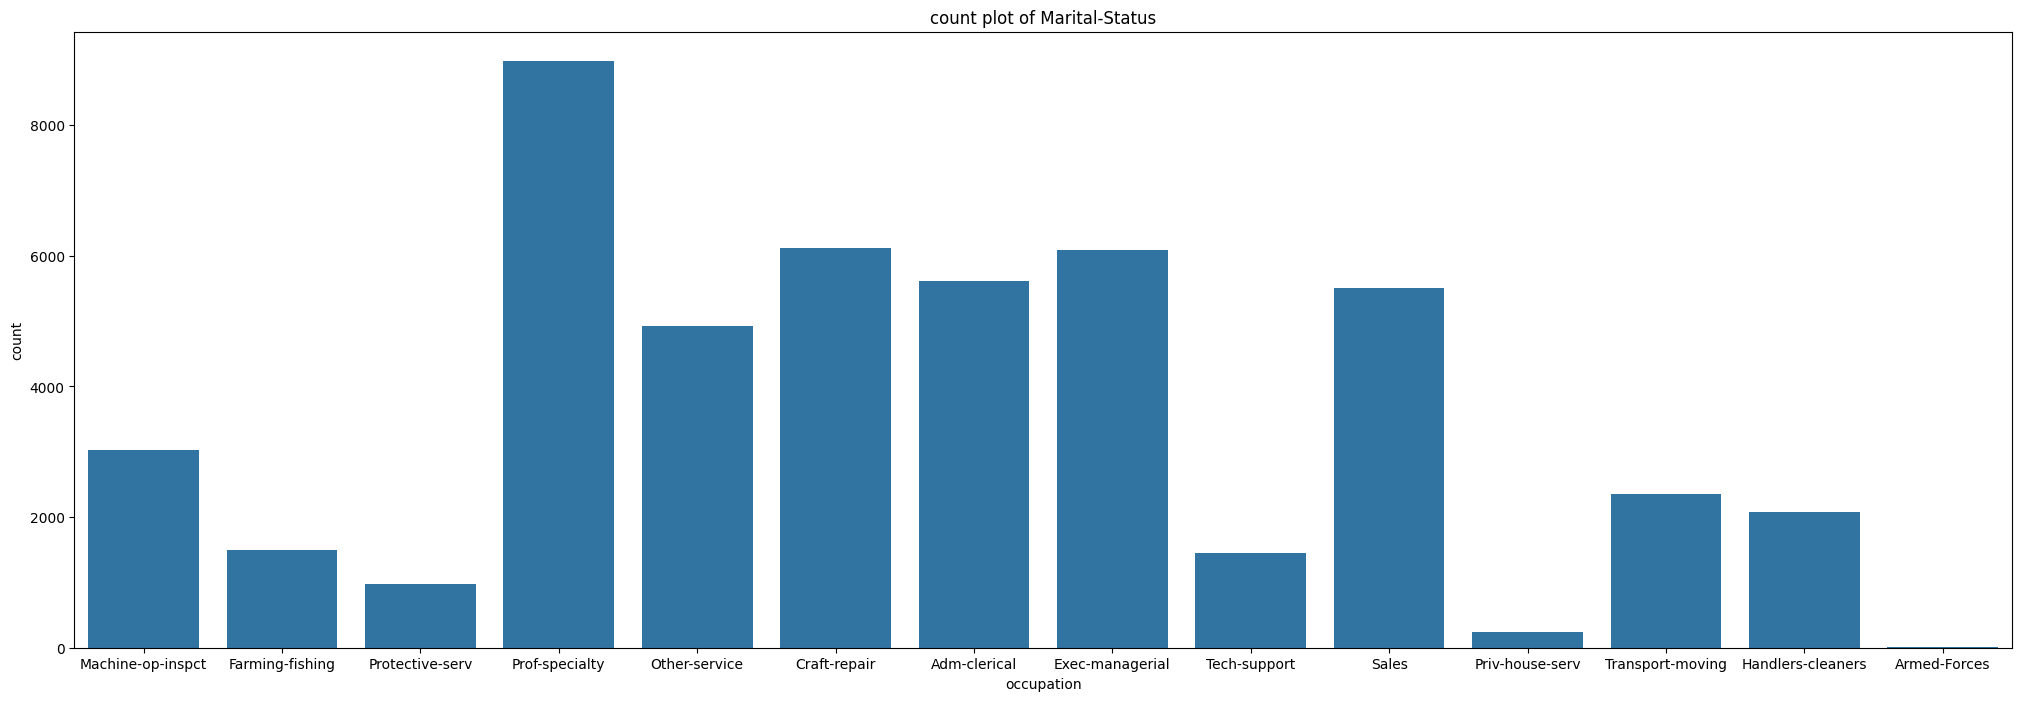

In [266]:
plt.figure(figsize=(25,8))
ax=sns.countplot(x='occupation',data=data)
plt.title('count plot of Marital-Status')
plt.show()

II. Description about distribution

->There are 14 unique categories present in the occupation attribute.

->Prof-specially has the maximum count(8981) but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.

->Armed-Forces *has minimum samples in the *occupation** attribute

1.10 Relationship

i.Distribution

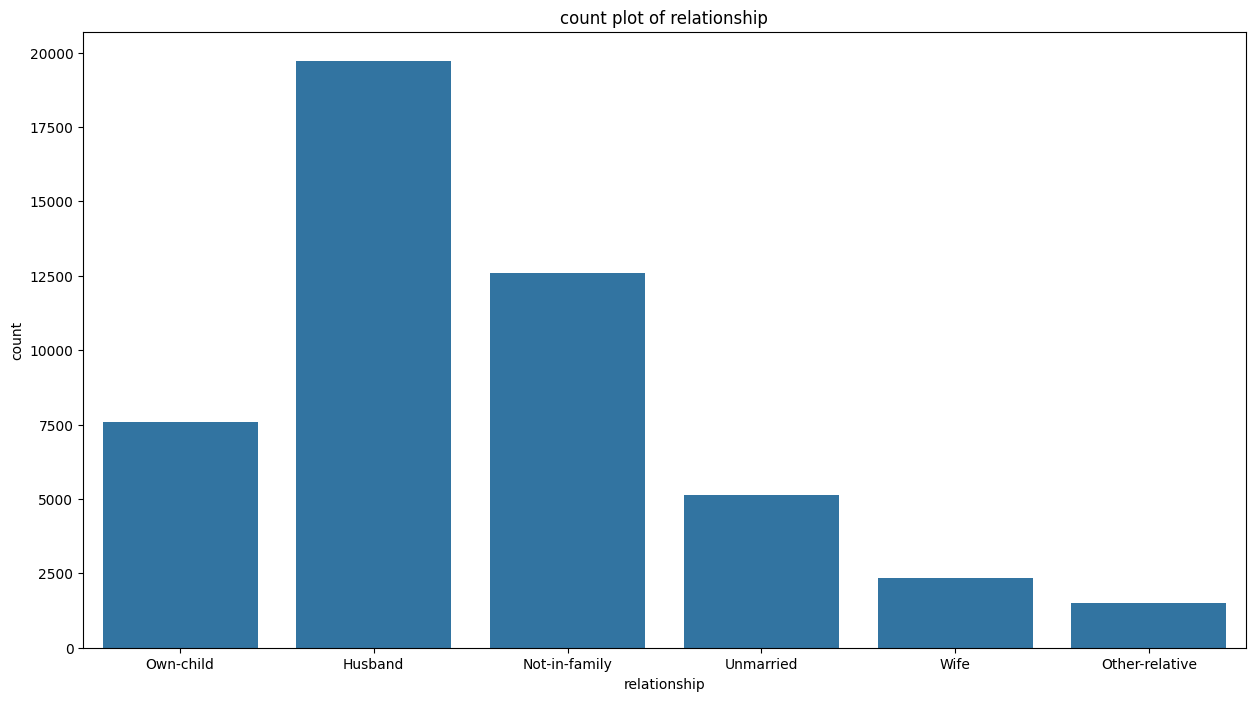

In [267]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x='relationship',data=data)
plt.title('count plot of relationship')
plt.show()

ii.Description about distribution

->There are 6 unique categories in the relationship attribute.

->Husband has maximum present(40.37%) among all categoreis following by not-in-family(25.76%)

1.11 Race

i.Distribution

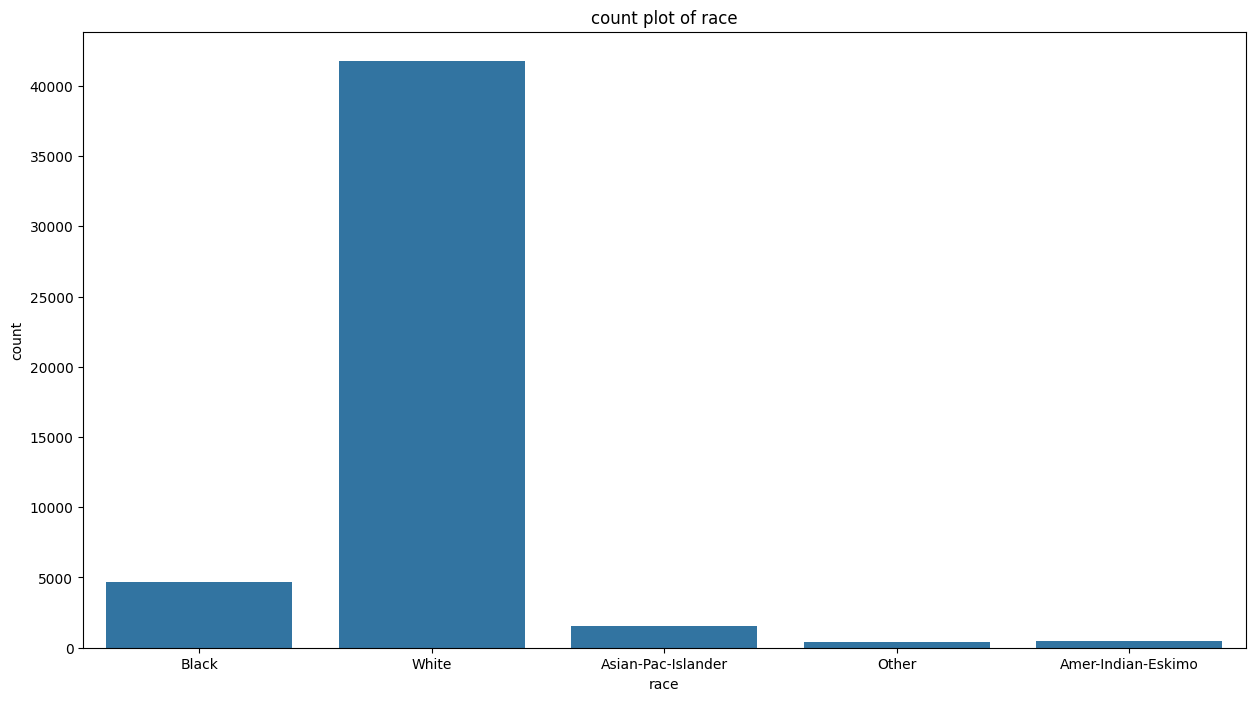

In [268]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x='race',data=data)
plt.title('count plot of race')
plt.show()

ii. Description about distribution

The distribution explains that:

-> There are 5 unique categories in the race attribute.

-> Most of them are "white" which is roughly 85.50%.

-> This dataset is totally bias toward the "white" race.

-> Second major race in the dataset is the "black" with just 9.59%.

1.12 Gender

i.Distribution

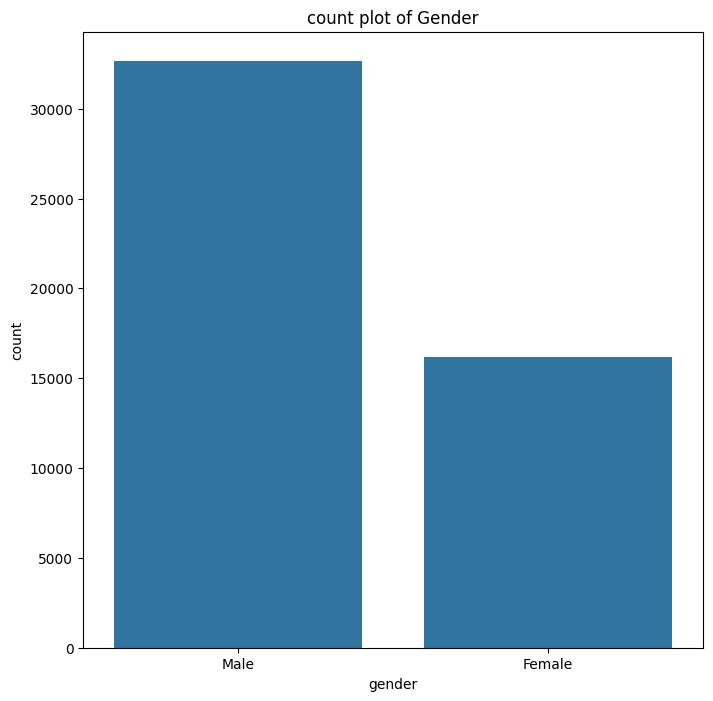

In [269]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='gender',data=data)
plt.title('count plot of Gender')
plt.show()